In [16]:
!apt-get install git
!git clone https://github.com/DataScientest-Studio/AU23_Plantes.git


%cd /content/AU23_Plantes
!git checkout AU23_Plantes_Gilles
!git branch


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
fatal: destination path 'AU23_Plantes' already exists and is not an empty directory.
/content/AU23_Plantes
M	src/features/data_builder.py
Already on 'AU23_Plantes_Gilles'
Your branch is up to date with 'origin/AU23_Plantes_Gilles'.
* AU23_Plantes_Gilles
  main


In [17]:
import sys
sys.path.append("/content/AU23_Plantes")

import src
import src.features as lf
import src.models as lm
import src.visualization as lv
from src.models.models import *

lm.models.RECORD_DIR='../models/records'


Data loading
---------

In [6]:
#### Data building
data = lf.data_builder.create_dataset_from_directory('/content/dataset')


Model Loading
---------

In [19]:

#### Train Campaigns
campaign_id='test'

#### Stage 1
stage1_resnet = Stage1ResNetv2(data)
stage1_resnet.fit_or_load(campaign_id, training=True)


stage1_mobilenet = Stage1MobileNetv3(data)
stage1_mobilenet.fit_or_load(campaign_id, training=True)

Found 4387 validated image filenames belonging to 12 classes.
Found 598 validated image filenames belonging to 12 classes.
Found 554 validated image filenames belonging to 12 classes.
>>> Stage-1_ResNetv2 –– Training
138/138 [==============================] - 105s 738ms/step - loss: 1.8014 - categorical_accuracy: 0.3994 - val_loss: 1.1011 - val_categorical_accuracy: 0.6722 - lr: 0.0010
>>> Stage-1_ResNetv2 –– Serialize 
Found 4387 validated image filenames belonging to 12 classes.
Found 598 validated image filenames belonging to 12 classes.
Found 554 validated image filenames belonging to 12 classes.
>>> Stage-1_MobileNetv3 –– Training
138/138 [==============================] - 100s 701ms/step - loss: 1.9609 - categorical_accuracy: 0.3241 - val_loss: 1.2678 - val_categorical_accuracy: 0.6070 - lr: 0.0010
>>> Stage-1_MobileNetv3 –– Serialize 


Model evaluation
-------

In [20]:
img = data.dataframe.iloc[8]
print(f"Pred : {stage1_mobilenet.single_prediction(img.path)}")
print(f"Actual : {img.label}")

>>> Stage-1_MobileNetv3 –– Evaluation
1/1 [==============================] - 1s 962ms/step
Pred : Cleavers
Actual : Cleavers


In [21]:
results = stage1_mobilenet.evaluate()
display(results)

>>> Stage-1_MobileNetv3 –– Evaluation
18/18 [==============================] - 6s 298ms/step


,filename,actual,predicted,Same
0,/content/dataset/Maize/10.png,Maize,Maize,True
1,/content/dataset/Sugar beet/63.png,Sugar beet,Sugar beet,True
2,/content/dataset/Scentless Mayweed/287.png,Scentless Mayweed,Shepherd's Purse,False
3,/content/dataset/Loose Silky-bent/701.png,Loose Silky-bent,Black-grass,False
4,/content/dataset/Cleavers/281.png,Cleavers,Shepherd's Purse,False
...,...,...,...,...
549,/content/dataset/Loose Silky-bent/245.png,Loose Silky-bent,Black-grass,False
550,/content/dataset/Sugar beet/443.png,Sugar beet,Sugar beet,True
551,/content/dataset/Loose Silky-bent/145.png,Loose Silky-bent,Black-grass,False
552,/content/dataset/Fat Hen/315.png,Fat Hen,Maize,False


>>> Stage-1_MobileNetv3 –– Display training data samples


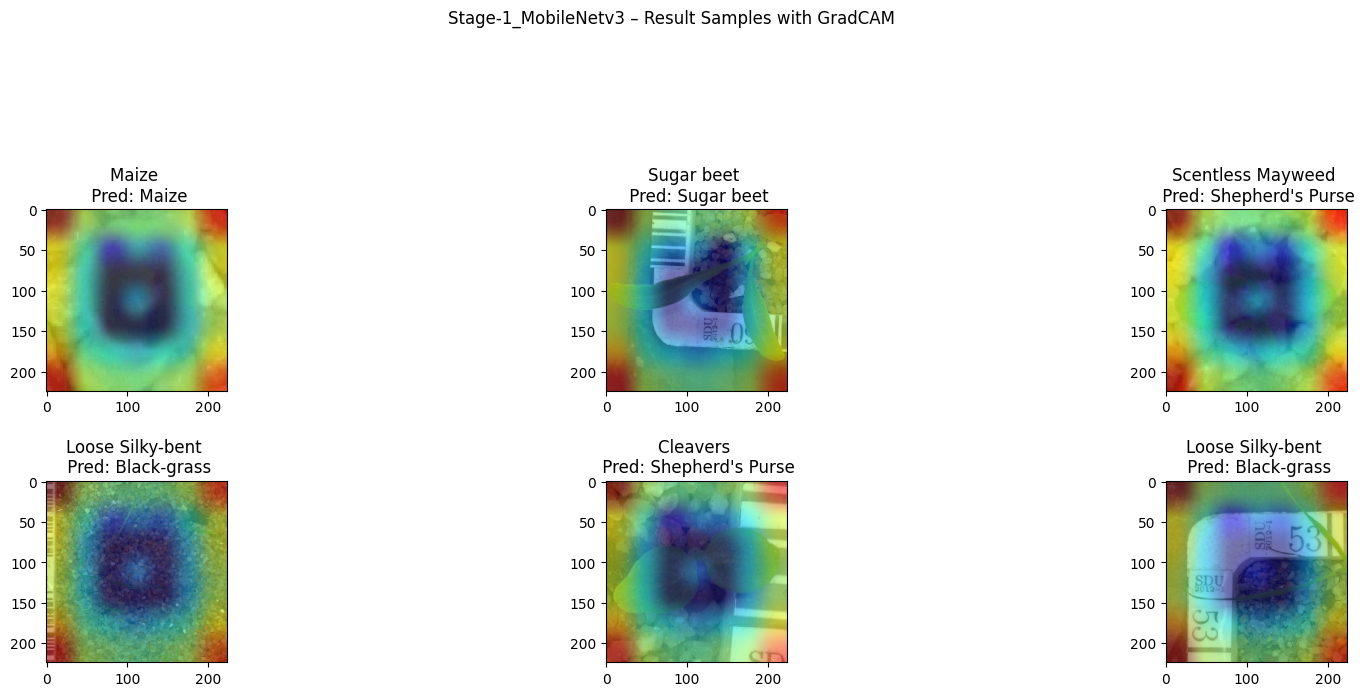

In [22]:
stage1_mobilenet.display_samples(nb=6, gradcam=True)

>>> Stage-1_ResNetv2 –– Evaluation
18/18 [==============================] - 6s 301ms/step
>>> Stage-1_ResNetv2 –– Display training data samples


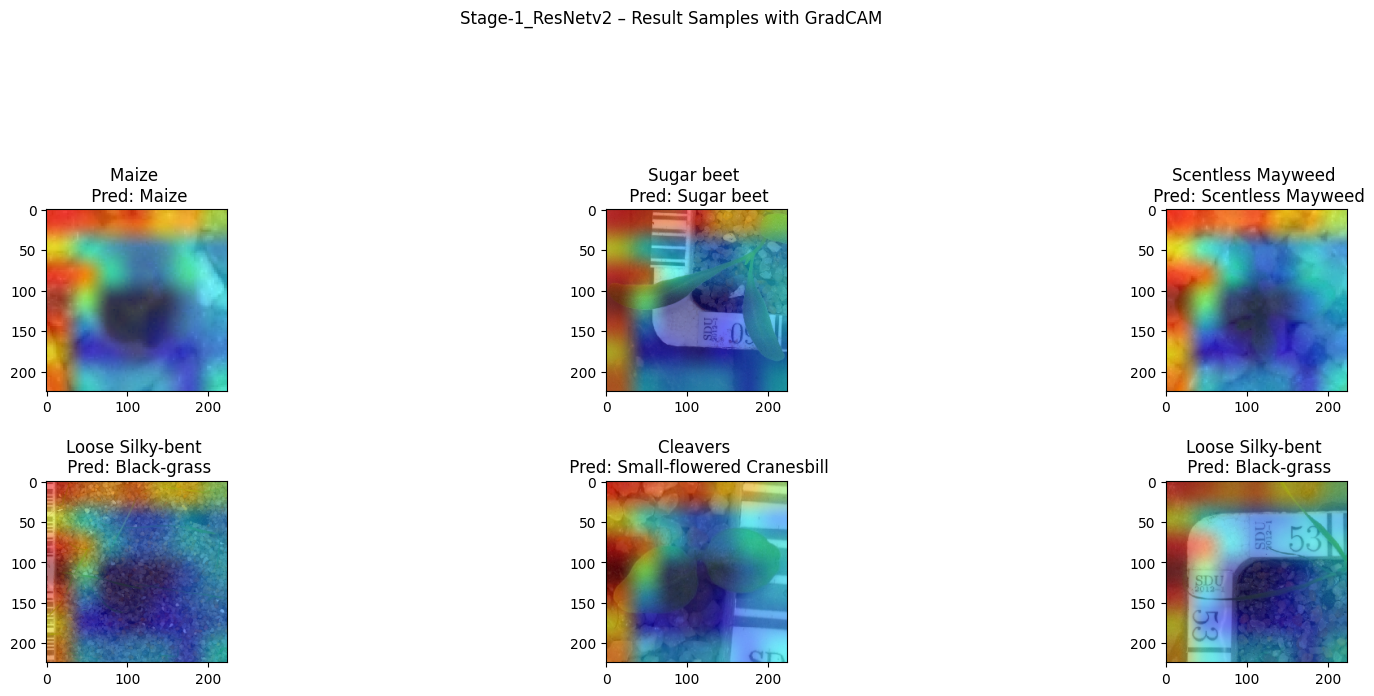

In [23]:
stage1_resnet.evaluate()
stage1_resnet.display_samples(nb=6, gradcam=True)

In [24]:
stage1_resnet.print_classification_report();

>>> Stage-1_ResNetv2 –– Classification Report
                           precision    recall  f1-score   support

              Black-grass       0.51      0.51      0.51        37
                 Charlock       0.81      0.86      0.83        50
                 Cleavers       1.00      0.50      0.67        38
         Common Chickweed       0.61      0.64      0.62        70
             Common wheat       0.60      0.75      0.67        16
                  Fat Hen       0.95      0.36      0.53        55
         Loose Silky-bent       0.72      0.60      0.65        72
                    Maize       0.88      0.75      0.81        20
        Scentless Mayweed       0.61      0.80      0.70        71
         Shepherd's Purse       0.34      0.57      0.43        28
Small-flowered Cranesbill       0.58      0.72      0.64        50
               Sugar beet       0.82      0.89      0.86        47

                 accuracy                           0.66       554
              

In [25]:
stage1_mobilenet.print_classification_report();

>>> Stage-1_MobileNetv3 –– Classification Report
                           precision    recall  f1-score   support

              Black-grass       0.32      0.68      0.44        37
                 Charlock       0.75      0.88      0.81        50
                 Cleavers       0.95      0.50      0.66        38
         Common Chickweed       0.70      0.33      0.45        70
             Common wheat       0.16      0.19      0.17        16
                  Fat Hen       0.53      0.16      0.25        55
         Loose Silky-bent       0.71      0.31      0.43        72
                    Maize       0.59      0.80      0.68        20
        Scentless Mayweed       0.47      0.20      0.28        71
         Shepherd's Purse       0.23      0.82      0.35        28
Small-flowered Cranesbill       0.70      0.52      0.60        50
               Sugar beet       0.42      0.91      0.58        47

                 accuracy                           0.48       554
           

In [26]:
stage1_mobilenet.single_prediction(data.dataframe.iloc[8].path)


>>> Stage-1_MobileNetv3 –– Evaluation
1/1 [==============================] - 0s 27ms/step


'Cleavers'

In [27]:
stage1_resnet.single_prediction(data.dataframe.iloc[8].path)

>>> Stage-1_ResNetv2 –– Evaluation
1/1 [==============================] - 1s 898ms/step


'Cleavers'